Узнаем, что будет если собрать много деревьев в одном месте. 

Спойлер - получится лес! Случайный лес! 

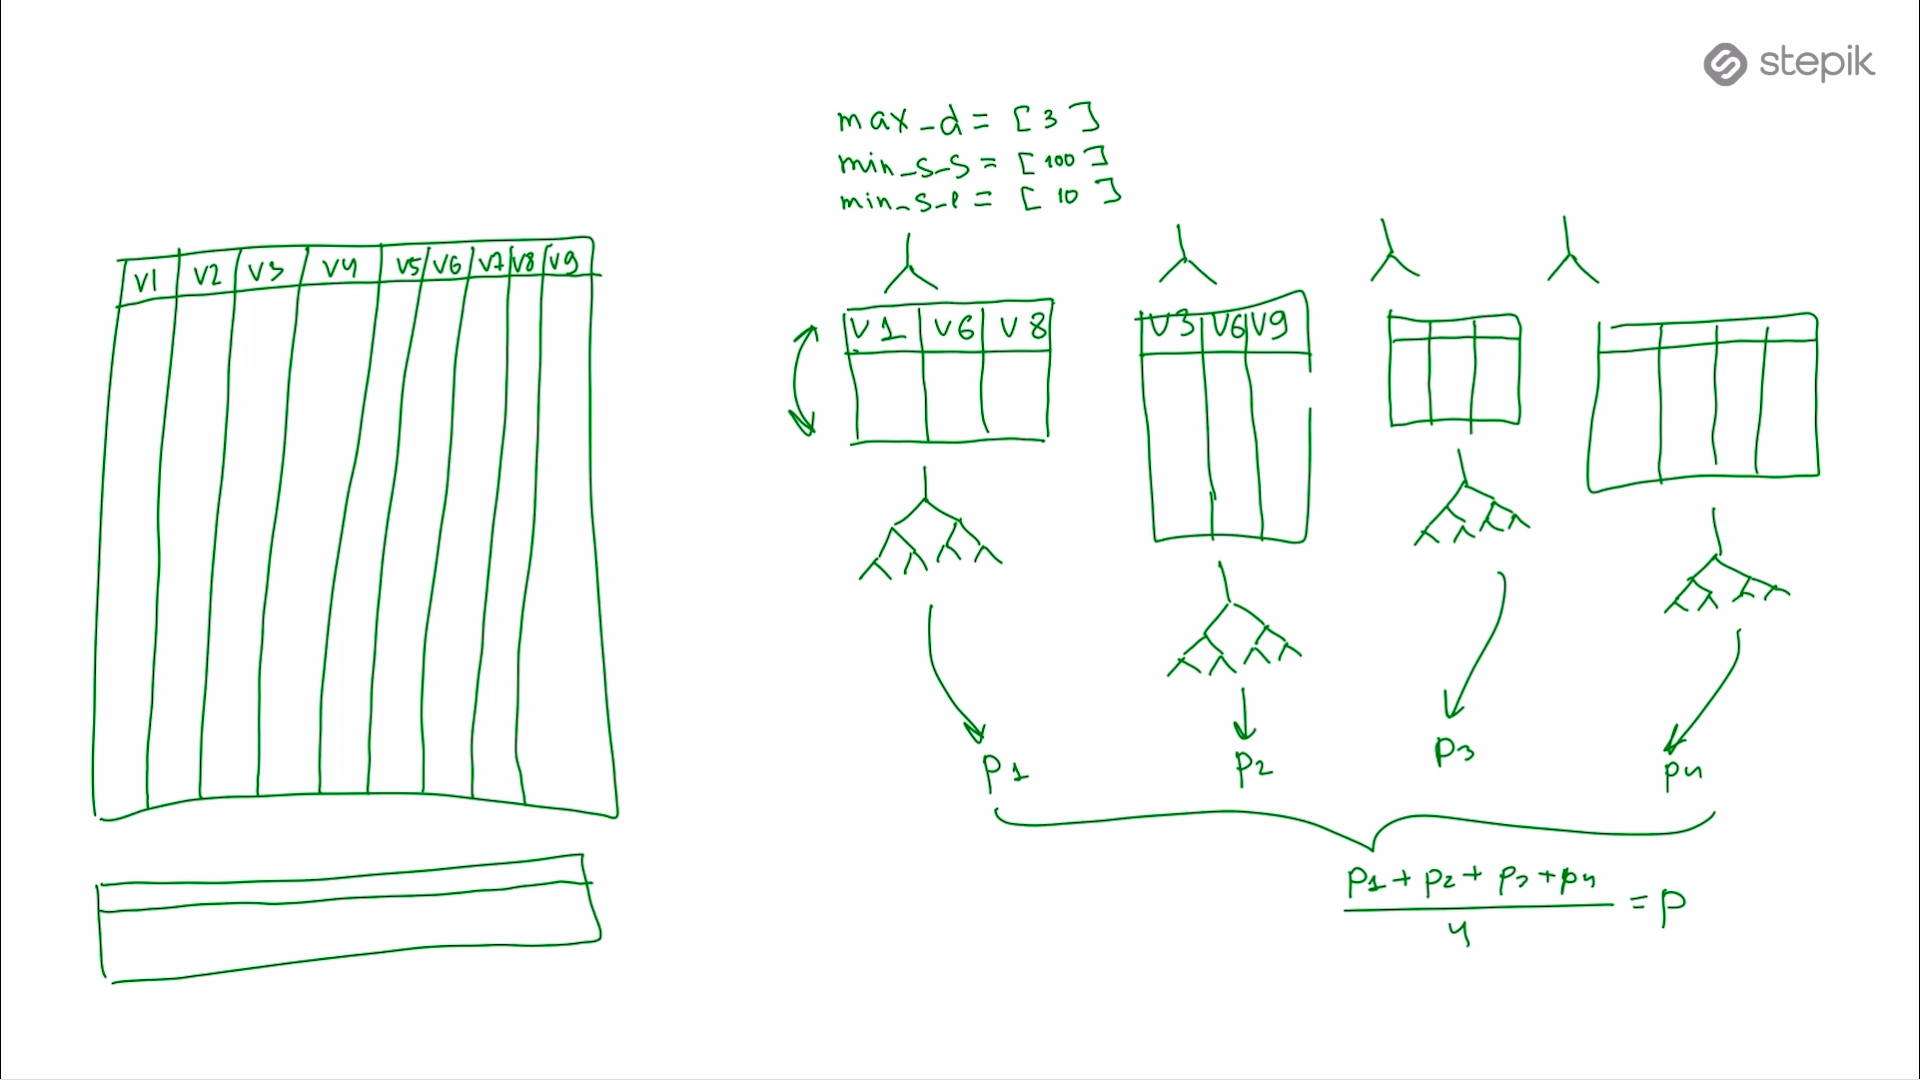

[ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier)


Пример увеличения аккуратности модели с увеличением числа деревьев
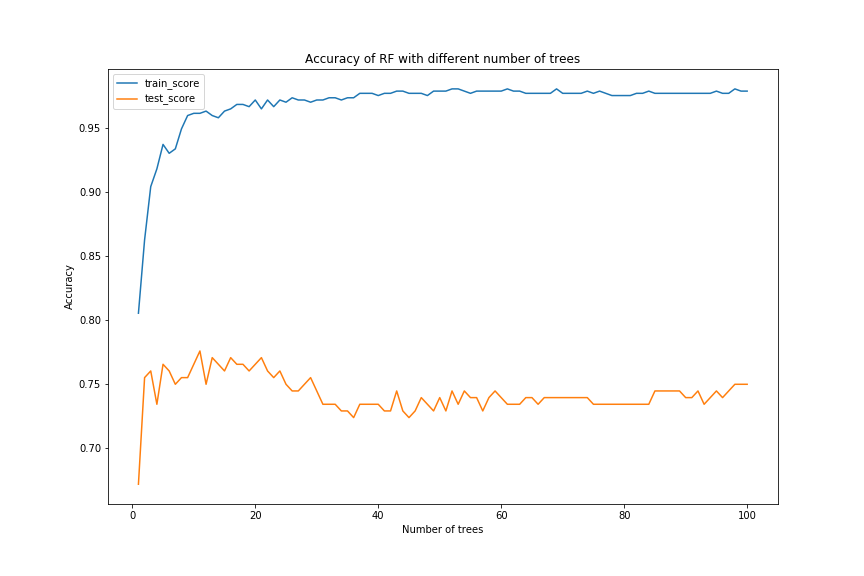

In [2]:
%matplotlib inline

from IPython.display import HTML
style = "<style>svg{width:70% !important;height:70% !important;}.container{width:70% !important;}</style></style>"
# HTML(style)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
titanic_data = pd.read_csv('data/train.csv')
y = titanic_data['Survived']
x = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
x = pd.get_dummies(x)
x = x.fillna({'Age': x['Age'].median()})
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.33, random_state=42)

In [4]:
clf_rf = RandomForestClassifier()

In [5]:
parametrs = {"n_estimators": [10, 20, 30], "max_depth": [2, 5, 7, 10]}

In [6]:
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=5)
grid_search_cv_clf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

cv=5  говорит о том, что в каждый проверочный семпл при кросс-валидации попадет 100/5=20% данных. На 80% учимся, на 20% проверяем.

Если увеличить до cv=10, то обучаться будем на 90% данных, на 10% проверяться. Так вот, если у нас всего данных не так уж и много, то уменьшение проверочного семпла с 20% до 10% негативно отразится на результатах (т.к. 10% данных окажется статистически не значимым).

А если уменьшить до cv=3, то проверочных данных в семпле станет хоть и больше (что неплохо), но тогда меньше  обучающих данных и меньше самих разных семплов для проверки (что начинает противоречить самой идеи кросс-валидации).

Изменение cv конечно изменит итоговый результат, и подбирать значение нужно исходя из к-ва доступных данных. cv=5 это такое довольно универсальное значение.

In [7]:
grid_search_cv_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'n_estimators': [10, 20, 30]})

In [8]:
grid_search_cv_clf.best_params_

{'max_depth': 7, 'n_estimators': 30}

In [9]:
best_clf = grid_search_cv_clf.best_estimator_

In [10]:
best_clf.score(x_test, y_test)

0.8305084745762712

In [11]:
feature_importances = best_clf.feature_importances_
feature_importances

array([0.12700372, 0.14834901, 0.05144917, 0.04528616, 0.19410813,
       0.16326122, 0.21736725, 0.01908122, 0.00934251, 0.02475162])

In [12]:
feature_importances_df = pd.DataFrame({"features": list(x_train), "feature_importances": feature_importances})
feature_importances_df

,features,feature_importances
0,Pclass,0.127004
1,Age,0.148349
2,SibSp,0.051449
3,Parch,0.045286
4,Fare,0.194108
5,Sex_female,0.163261
6,Sex_male,0.217367
7,Embarked_C,0.019081
8,Embarked_Q,0.009343
9,Embarked_S,0.024752


In [13]:
feature_importances_df.sort_values("feature_importances", ascending=False)

,features,feature_importances
6,Sex_male,0.217367
4,Fare,0.194108
5,Sex_female,0.163261
1,Age,0.148349
0,Pclass,0.127004
2,SibSp,0.051449
3,Parch,0.045286
9,Embarked_S,0.024752
7,Embarked_C,0.019081
8,Embarked_Q,0.009343


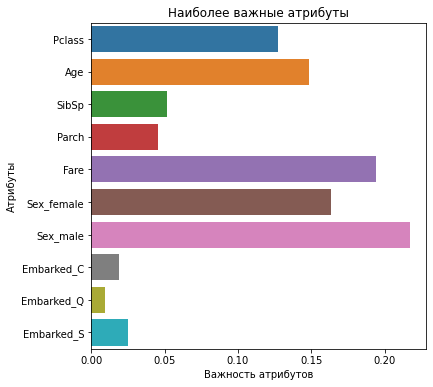

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt


f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=feature_importances_df.features, x=feature_importances_df.feature_importances)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

## Вопрос 
Отметьте верные утверждения о  Random Forest

- Каждое дерево в лесу получает случайный поднабор данных
- Предсказание леса - усреднённые предсказания деревьев 

In [1]:
# команда что бы влючит подксказки по Tab
%config Completer.use_jedi = False

## Задание 

Разминочная задачка - создайте модель RandomForestClassifier с 15 деревьями и максимальной глубиной равной 5 уровням, поместите её в переменную rf. Обучите модель на данных x_train и y_train, предскажите класс для наблюдений в x_test и поместите его в переменную predictions.

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(n_estimators=15,max_depth=5)
predictions = rf.fit(x_train,y_train).predict(x_test)

В Data Science очень важен подбор параметров и предобработка данных. Для хорошего решения почти любой нетривиальной проблемы нужно понять примерную структуру данных, получить их представление в удобном для использования моделью виде. К первому относится [эксплоративный анализ](https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15) ([EDA](https://en.wikipedia.org/wiki/Exploratory_data_analysis)), а для второго есть feature engineering.

Пример с Decision Tree или Random Forest - допустим, исходные данные выглядят так:

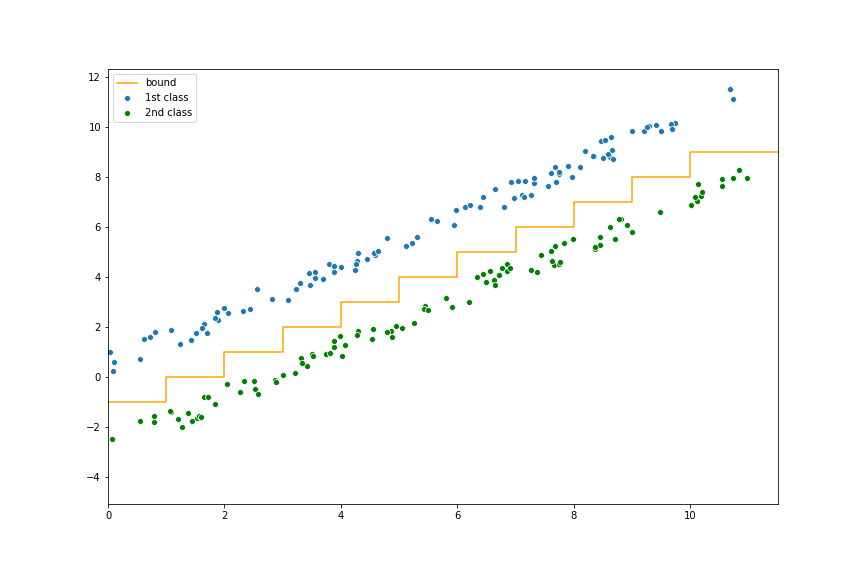

Граница, которую проведёт дерево, будет представлять собою ломанную, и деревьям потребуется большая глубина, чтобы разделить данные.  В то же время, если мы просто [повернём](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0_%D0%BF%D0%BE%D0%B2%D0%BE%D1%80%D0%BE%D1%82%D0%B0) наши данные на 45 градусов, то получим такую картину:

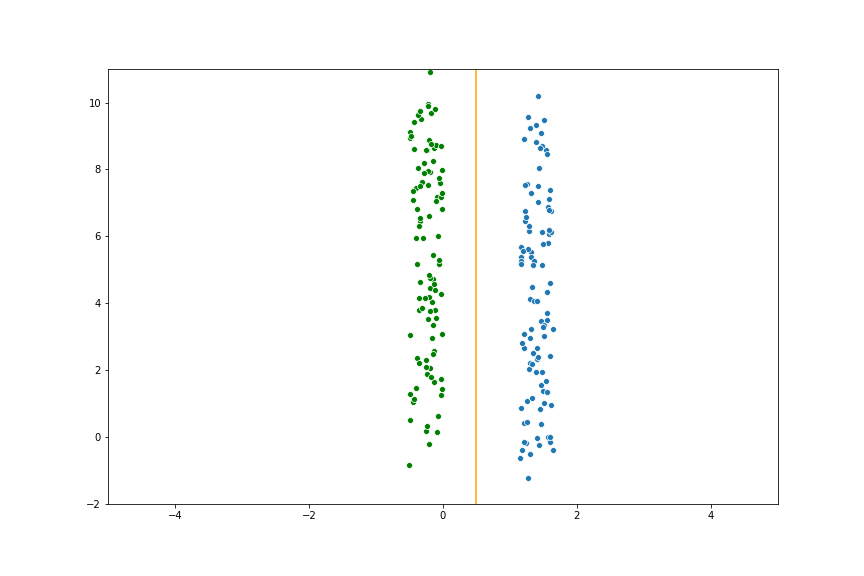

Теперь дерево может разделить данные всего за 1 шаг

**Предсказания, которые дают модели, это уже хорошо, однако не всегда достаточно. С разными усилиями, мы также можем извлечь важность переменных для осуществления предсказания. Это особенно интересно в науке, где мы пытаемся выявить причинно-следственные связи (хотя, от важности переменных до проверки этих связей ещё длинный путь). Из Decision Tree и Random Forest легко вытащить важность переменных для предсказания, но есть одна особенность. При высокой скореллированности нескольких переменных сплит по любой из них может давать одинаковый Information Gain, и выбор будет сделан случайно. То есть, важность фичей может изменяться в зависимости от выбора из равноценных в процессе обучения. Поэтому следует смотреть на корреляцию между переменными перед обучением, чтобы лучше представлять данные.**

## Вопрос

Воспользуемся [данными о сердечных заболеваниях](https://www.kaggle.com/ronitf/heart-disease-uci) и обучим на них Random Forest. Постройте график важности переменных для классификации и выберите среди предложенных вариантов наиболее похожий.

В задании присутствует рандом, прогоните обучение случайного леса и построение графика несколько раз, чтобы увидеть изменения в важности фичей (5 самых важных обычно присутствуют в топе, просто в разном порядке).
Чтобы получить такой же график, как в правильном варианте ответа, сделайте

```python
np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)
```

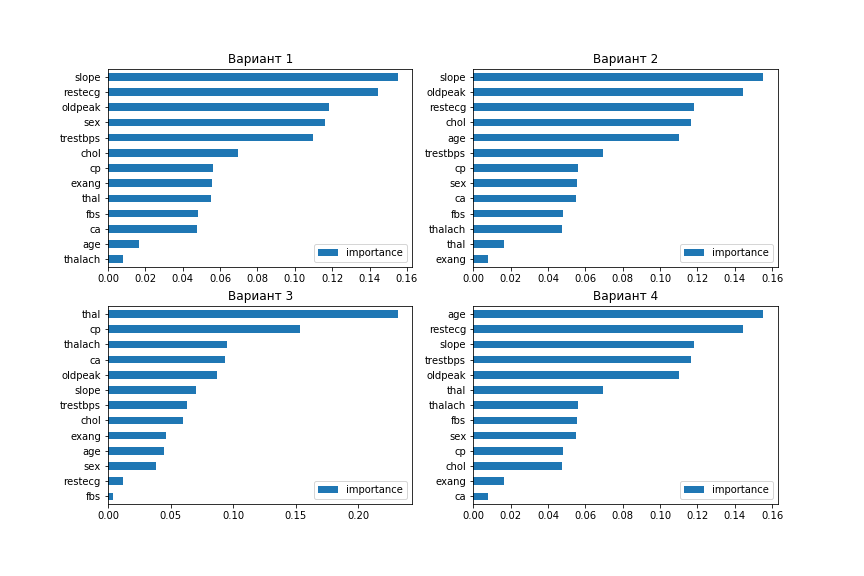

Код для отрисовки важности фичей

```python
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))
```

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('data/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df = pd.get_dummies(df, drop_first=True)

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), 
                                                    df['target'], 
                                                    test_size=0.33, 
                                                    random_state=42)

In [17]:
np.random.seed(0)
rf = RandomForestClassifier(10, max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

<AxesSubplot:>

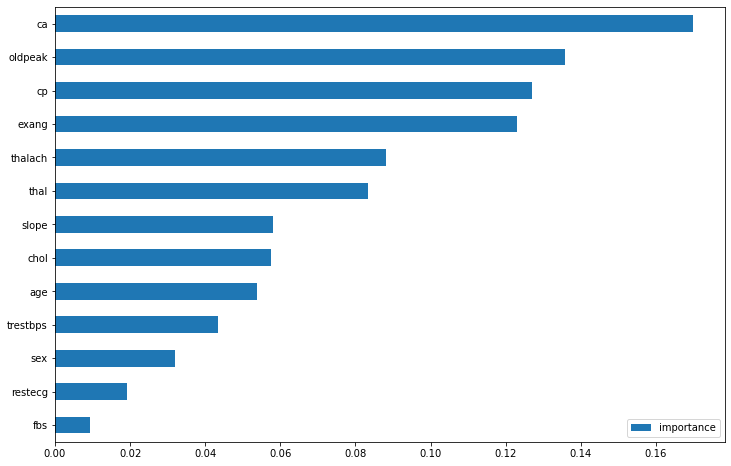

In [19]:
imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

<AxesSubplot:>

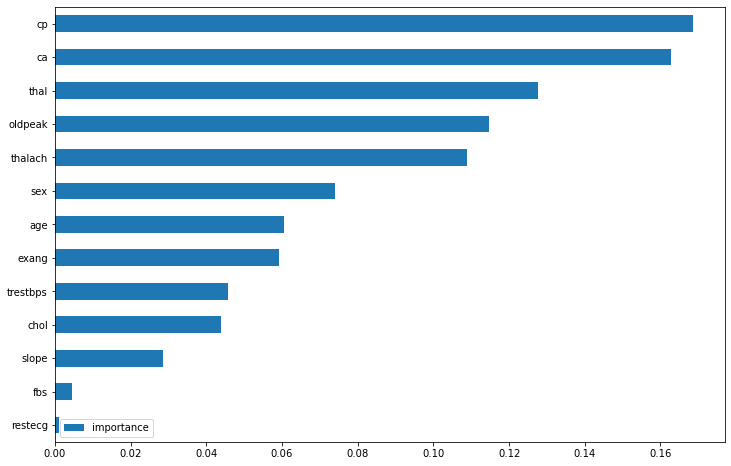

In [20]:
x = df.drop('target', axis=1)
y = df.target

np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

rf = RandomForestClassifier(10, max_depth=5)
rf.fit(x_train, y_train)
imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

<AxesSubplot:>

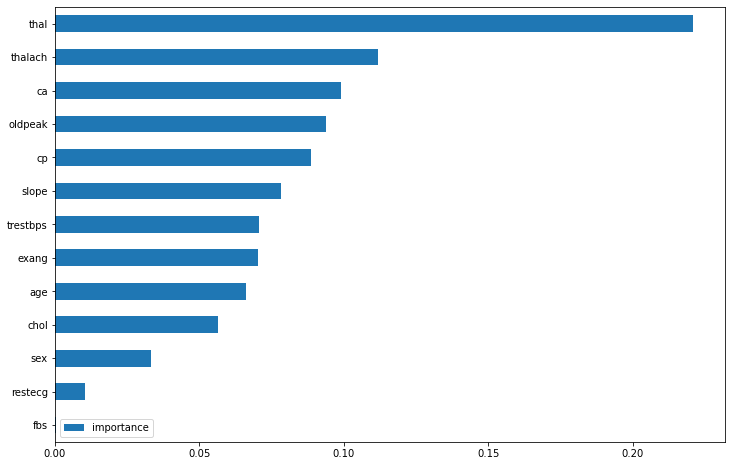

In [22]:
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

np.random.seed(0)

rf = RandomForestClassifier(10, max_depth=5)

rf.fit(X_train, y_train)

imp = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))